<h1>Extracting and Visualizing Stock Data</h1>
<h2>Description</h2>

<h2>Table of Contents</h2>
<div class="alert alert-block alert-info" style="margin-top: 20px">
    <ul>
        <li>Define a Function that Makes a Graph</li>
        <li>Question 1: Use yfinance to Extract Stock Data</li>
        <li>Question 2: Use Webscraping to Extract Tesla Revenue Data</li>
        <li>Question 3: Use yfinance to Extract Stock Data</li>
        <li>Question 4: Use Webscraping to Extract GME Revenue Data</li>
        <li>Question 5: Plot Tesla Stock Graph</li>
        <li>Question 6: Plot GameStop Stock Graph</li>
    </ul>

In [52]:
!pip install yfinance
#!pip install pandas
#!pip install requests
!pip install bs4
!pip install plotly
!pip install nbformat>=4.2.0

In [2]:
import yfinance as yf
import pandas as pd
import requests
from bs4 import BeautifulSoup
import plotly.graph_objects as go
from plotly.subplots import make_subplots

## Define Graphing Function

In [72]:
import matplotlib.pyplot as plt
import pandas as pd

def make_graph(stock_data, revenue_data, stock):
    fig, axs = plt.subplots(2, 1, sharex=True, figsize=(10, 8))
    
    # Graficar los datos de precios de acciones
    axs[0].plot(pd.to_datetime(stock_data['Date'], infer_datetime_format=True), stock_data['Close'].astype(float), label='Share Price')
    axs[0].set_ylabel('Price ($US)')
    axs[0].set_title('Historical Share Price for {}'.format(stock))
    
    # Graficar los datos de ingresos
    if 'Revenue' in revenue_data.columns:  # Comprobamos si hay una columna 'Revenue' en los datos de ingresos
        revenue_data['Revenue'] = pd.to_numeric(revenue_data['Revenue'], errors='coerce')  # Convertir a números y manejar valores nulos
        axs[1].plot(pd.to_datetime(revenue_data['Date'], infer_datetime_format=True), revenue_data['Revenue'], label='Revenue')
        axs[1].set_ylabel('Revenue ($US Millions)')
        axs[1].set_title('Historical Revenue for {}'.format(stock))
    
    # Configuración adicional del gráfico
    plt.xlabel('Date')
    plt.tight_layout()
    plt.show()

## Question 1: Use yfinance to Extract Stock Data


In [37]:
tesla = yf.Ticker("TSLA")
tesla_data = tesla.history(period="max")
tesla_data.reset_index(inplace=True)
tesla_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2010-06-29 00:00:00-04:00,1.266667,1.666667,1.169333,1.592667,281494500,0.0,0.0
1,2010-06-30 00:00:00-04:00,1.719333,2.028000,1.553333,1.588667,257806500,0.0,0.0
2,2010-07-01 00:00:00-04:00,1.666667,1.728000,1.351333,1.464000,123282000,0.0,0.0
3,2010-07-02 00:00:00-04:00,1.533333,1.540000,1.247333,1.280000,77097000,0.0,0.0
4,2010-07-06 00:00:00-04:00,1.333333,1.333333,1.055333,1.074000,103003500,0.0,0.0


## Question 2: Use Webscraping to Extract Tesla Revenue Data

In [38]:
tesla_url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm"
tesla_html_data = requests.get(tesla_url).text
tesla_soup = BeautifulSoup(tesla_html_data, "html5lib")

tesla_tables = tesla_soup.find_all('table')

In [39]:
tesla_tables = tesla_soup.find_all('table')

for index,table in enumerate(tesla_tables):
    if ("Tesla Quarterly Revenue" in str(table)):
        tesla_table_index = index

tesla_revenue = pd.DataFrame(columns=["Date", "Revenue"])

for row in tesla_tables[tesla_table_index].tbody.find_all("tr"):
    col = row.find_all("td")
    if (col !=[]):
        date = col[0].text
        revenue = col[1].text.replace("$", "").replace(",", "")
        tesla_revenue = tesla_revenue._append({"Date" : date, "Revenue" : revenue}, ignore_index=True)

In [22]:
tesla_revenue.dropna(inplace=True)

tesla_revenue = tesla_revenue[tesla_revenue['Revenue'] != ""]

In [70]:
tesla_revenue

,Date,Revenue
0,2022-09-30,21454
1,2022-06-30,16934
2,2022-03-31,18756
3,2021-12-31,17719
4,2021-09-30,13757
5,2021-06-30,11958
6,2021-03-31,10389
7,2020-12-31,10744
8,2020-09-30,8771
9,2020-06-30,6036


## Question 3: Use yfinance to Extract Stock Data

In [41]:
gamestop = yf.Ticker("GME")
gme_data = gamestop.history(period="max")

In [42]:
gme_data.reset_index(inplace=True)
gme_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2002-02-13 00:00:00-05:00,1.620128,1.693350,1.603296,1.691666,76216000,0.0,0.0
1,2002-02-14 00:00:00-05:00,1.712707,1.716074,1.670626,1.683250,11021600,0.0,0.0
2,2002-02-15 00:00:00-05:00,1.683250,1.687458,1.658001,1.674834,8389600,0.0,0.0
3,2002-02-19 00:00:00-05:00,1.666418,1.666418,1.578047,1.607504,7410400,0.0,0.0
4,2002-02-20 00:00:00-05:00,1.615920,1.662210,1.603296,1.662210,6892800,0.0,0.0


## Question 4: Use Webscraping to Extract GME Revenue Data

In [43]:
gme_url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html"

gme_html_data = requests.get(gme_url).text

gme_soup = BeautifulSoup(gme_html_data, "html5lib")

In [44]:
gme_tables = gme_soup.find_all('table')

for index,table in enumerate(gme_tables):
    if ("GameStop Quarterly Revenue" in str(table)):
        gme_table_index = index

gme_revenue = pd.DataFrame(columns=["Date", "Revenue"])

for row in gme_tables[gme_table_index].tbody.find_all("tr"):
    col = row.find_all("td")
    if (col !=[]):
        date = col[0].text
        revenue = col[1].text.replace("$", "").replace(",", "")
        gme_revenue = gme_revenue._append({"Date" : date, "Revenue" : revenue}, ignore_index=True)

In [71]:
gme_revenue

,Date,Revenue
0,2020-04-30,1021
1,2020-01-31,2194
2,2019-10-31,1439
3,2019-07-31,1286
4,2019-04-30,1548
...,...,...
57,2006-01-31,1667
58,2005-10-31,534
59,2005-07-31,416
60,2005-04-30,475


## Question 5: Plot Tesla Stock Graph

C:\Users\itorl\AppData\Local\Temp\ipykernel_26484\2876100543.py:8: UserWarning:

The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.

C:\Users\itorl\AppData\Local\Temp\ipykernel_26484\2876100543.py:15: UserWarning:

The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.



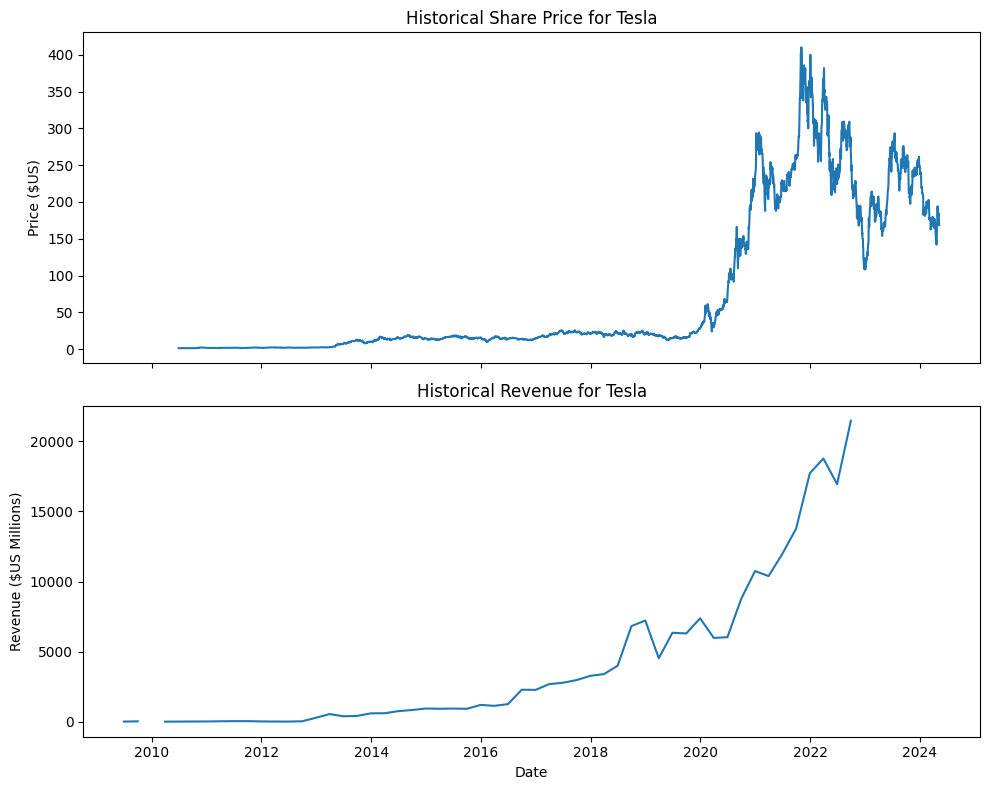

In [73]:
make_graph(tesla_data, tesla_revenue, 'Tesla')

## Question 6: Plot GameStop Stock Graph

C:\Users\itorl\AppData\Local\Temp\ipykernel_26484\2876100543.py:8: UserWarning:

The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.

C:\Users\itorl\AppData\Local\Temp\ipykernel_26484\2876100543.py:15: UserWarning:

The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.



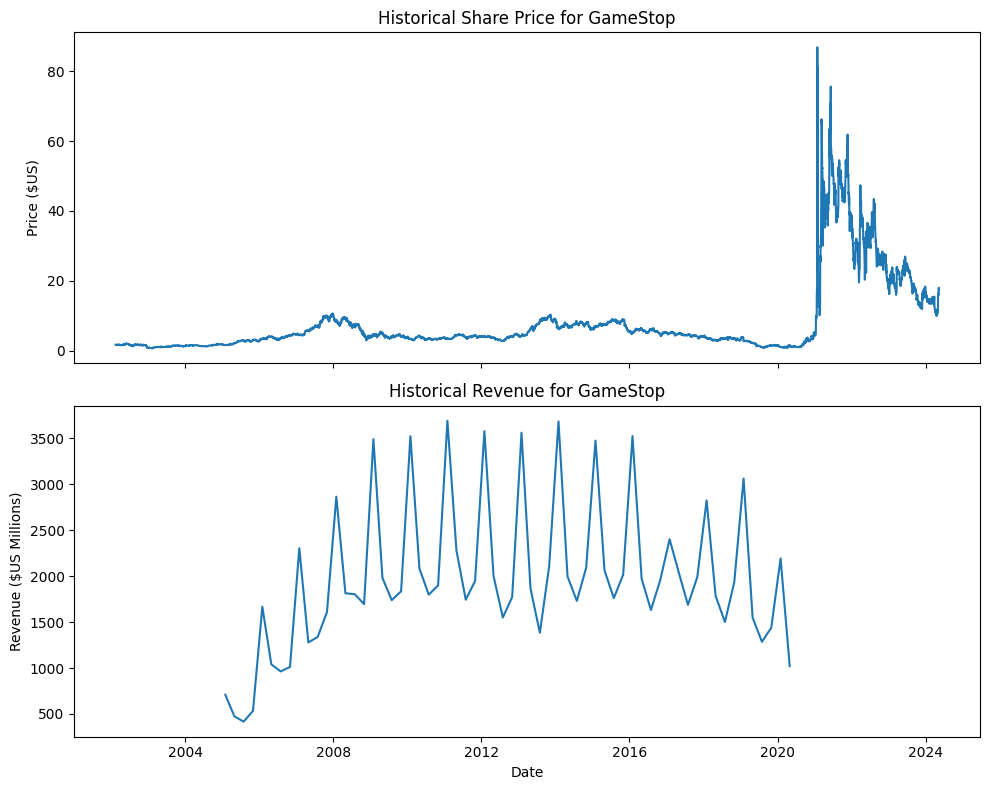

In [74]:
make_graph(gme_data, gme_revenue, 'GameStop')